In [31]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib
import sklearn

In [32]:
# This is a quick check of whether the notebook is currently running on Google Colaboratory
# or on Kaggle, as that makes some difference for the code below.
# We'll do this in every notebook of the course.
try:
    import colab
    colab=True
except:
    colab=False

import os
kaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

In [33]:
# Set the directory in which to store data
NB_DIR = Path.cwd()       # Set NB_DIR to be the current working directory
DATA = NB_DIR/'data'      # The data dir is the subdirectory 'data' under NB_DIR

DATA.mkdir(exist_ok=True) # Create the data directory

In [34]:
import urllib.request

# Define the file path
FILE = DATA / 'diabetes.csv'

# Download the file if it doesn't exist
if not FILE.exists():
    url = 'https://assets.datacamp.com/production/course_1939/datasets/diabetes.csv'
    urllib.request.urlretrieve(url, FILE)

In [35]:
diabetes = pd.read_csv('data/diabetes.csv')

In [36]:
diabetes.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


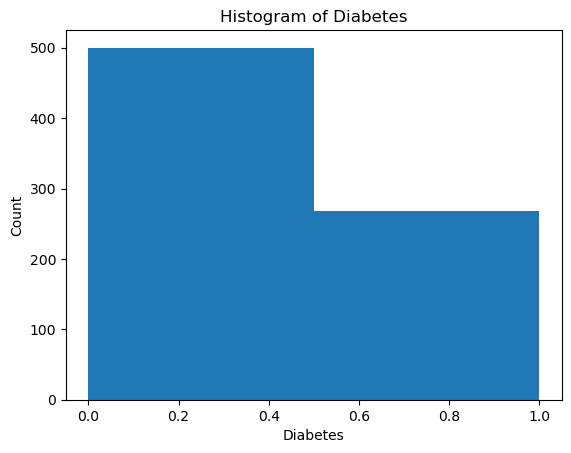

In [37]:
# Plot a histogram of the diabetes column
plt.hist(diabetes['diabetes'], bins=2)

# Add axis labels and a title
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.title('Histogram of Diabetes')

# Show the plot
plt.show()

In [38]:
X = diabetes.drop('diabetes', axis=1)
y = diabetes['diabetes']

In [39]:
X.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [40]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: diabetes, dtype: int64

In [41]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [42]:
len(X_train), len(X_test)

(576, 192)

In [43]:
from sklearn.linear_model import SGDClassifier

In [44]:
# Create an instance of the model:
sgd_clf = SGDClassifier(random_state=20)

In [45]:
# Train the model:
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=20)

In [46]:
y_pred = sgd_clf.predict(X_test)
y_pred[:10]  # Displaying the first 10 predictions

array([1, 0, 0, 0, 0, 1, 1, 1, 1, 0])

In [47]:
np.array(y_test)[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1])

In [50]:
print("True and predicted labels for the first 20 instances:")
#bruker zip for å printe de ved siden av hverandre. er vanskelig å få oversikt hvis det er slik som det er ovenfor.
print(list(zip(y_test, y_pred))[:20])

True and predicted labels for the first 20 instances:
[(0, np.int64(1)), (0, np.int64(0)), (0, np.int64(0)), (0, np.int64(0)), (0, np.int64(0)), (0, np.int64(1)), (0, np.int64(1)), (0, np.int64(1)), (0, np.int64(1)), (0, np.int64(0)), (1, np.int64(1)), (0, np.int64(1)), (1, np.int64(1)), (0, np.int64(1)), (0, np.int64(0)), (1, np.int64(1)), (0, np.int64(0)), (0, np.int64(1)), (1, np.int64(1)), (1, np.int64(1))]


In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5416666666666666